In [2]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>

# Author: Juliane F Oliveira

<h1 id="tocheading">Table of Contents</h1>
<div id="toc"></div>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

# Read data

In [5]:
df = pd.read_csv('/Users/julianeoliveira/Documents/Projects/AESOP/AESOP datalake/Filtered_raw/srag_2009_2022.csv', low_memory=False)

In [6]:
df.head()

,ano,sg_uf,sg_uf_not,codmunres,codmunnot,dt_sin_pri,dt_notific,sem_not,classi_fin,criterio
0,2011,11,11,110020.0,110020,15/02/2011,21/02/2011,201108,3.0,1.0
1,2011,11,53,110020.0,530010,29/03/2011,07/04/2011,201114,3.0,1.0
2,2011,11,11,110020.0,110020,28/04/2011,04/05/2011,201118,3.0,1.0
3,2011,11,11,110020.0,110020,23/08/2011,27/08/2011,201134,1.0,1.0
4,2011,11,11,110012.0,110020,18/08/2011,31/08/2011,201135,3.0,1.0


In [7]:
df.dtypes

ano             int64
sg_uf          object
sg_uf_not      object
codmunres     float64
codmunnot       int64
dt_sin_pri     object
dt_notific     object
sem_not         int64
classi_fin    float64
criterio       object
dtype: object

In [8]:
df.isnull().sum().sort_values(ascending = False)

criterio      263465
classi_fin    176498
sg_uf            528
codmunres        528
dt_notific         1
ano                0
sg_uf_not          0
codmunnot          0
dt_sin_pri         0
sem_not            0
dtype: int64

In [9]:
df.count()

ano           3827108
sg_uf         3826580
sg_uf_not     3827108
codmunres     3826580
codmunnot     3827108
dt_sin_pri    3827108
dt_notific    3827107
sem_not       3827108
classi_fin    3650610
criterio      3563643
dtype: int64

In [10]:
df['ones'] = 1

# Clean temporal variables

In [11]:
#df['dt_sin_pri'].unique().tolist()

lst = df['dt_sin_pri'].apply(len).tolist()

In [12]:
np.array(lst)

array([10, 10, 10, ..., 10, 10, 10])

In [13]:
np.unique(np.array(lst))

array([10])

In [14]:
df['dt_sin_pri']

0          15/02/2011
1          29/03/2011
2          28/04/2011
3          23/08/2011
4          18/08/2011
              ...    
3827103    28/12/2021
3827104    25/01/2021
3827105    19/12/2021
3827106    20/12/2021
3827107    10/08/2021
Name: dt_sin_pri, Length: 3827108, dtype: object

In [ ]:
#Aparentemente todos os valores da variável dt_sin_pri tem o mesmo comprimento

In [15]:
df[["dt_sin_pri", "dt_notific"]] = df[["dt_sin_pri", "dt_notific"]].apply(pd.to_datetime, infer_datetime_format=True)

In [16]:
df.dtypes

ano                    int64
sg_uf                 object
sg_uf_not             object
codmunres            float64
codmunnot              int64
dt_sin_pri    datetime64[ns]
dt_notific    datetime64[ns]
sem_not                int64
classi_fin           float64
criterio              object
ones                   int64
dtype: object

In [17]:
df['year_sin_pri'] = pd.DatetimeIndex(df['dt_sin_pri']).year
df['month_sin_pri'] = pd.DatetimeIndex(df['dt_sin_pri']).month
df['year_week_sin_pri'] = df['dt_sin_pri'].dt.strftime('%Y-%V')

In [18]:
df['week_sin_pri'] = df['dt_sin_pri'].dt.strftime('%V')

In [19]:
df['year_sin_not'] = pd.DatetimeIndex(df['dt_notific']).year
df['month_sin_not'] = pd.DatetimeIndex(df['dt_notific']).month
df['year_week_sin_not'] = df['dt_notific'].dt.strftime('%Y-%V')

# Checkpoint Counts

In [20]:
df.groupby(['ano'])['ones'].count()

ano
2009      88083
2010      11587
2011       4333
2012      21106
2013      36531
2014      19028
2015      14525
2016      54269
2017      29496
2018      47876
2019      48743
2020    1200995
2021    1733910
2022     516626
Name: ones, dtype: int64

In [21]:
df.groupby(['year_sin_pri'])['ones'].count()

year_sin_pri
2009      88250
2010      11413
2011       4424
2012      21181
2013      36545
2014      18996
2015      14553
2016      54380
2017      29580
2018      47802
2019      48597
2020    1187742
2021    1741543
2022     522102
Name: ones, dtype: int64

In [22]:
df.groupby(['year_sin_not'])['ones'].count()

year_sin_not
2009.0      88082
2010.0      11542
2011.0       4375
2012.0      21109
2013.0      36531
2014.0      19028
2015.0      14525
2016.0      54269
2017.0      29496
2018.0      47879
2019.0      48493
2020.0    1142843
2021.0    1762962
2022.0     545973
Name: ones, dtype: int64

In [ ]:
# Para o estudo, vou usar a variável data dos primeiros sintomas

# Clean UF variables

In [23]:
df['sg_uf'].unique()

array(['11', '12', '13', '14', '15', '16', '17', '21', '22', '23', '24',
       '25', '26', '27', '29', '31', '32', '33', '35', '41', '42', '43',
       '50', '51', '52', '53', '28', 'MG', 'SP', 'PE', 'MS', 'RJ', 'GO',
       'AL', 'PR', 'SC', 'PI', 'RS', 'BA', 'TO', 'AP', 'CE', 'RO', 'AC',
       'MT', 'PA', 'AM', 'DF', 'SE', 'ES', 'PB', 'MA', 'RN', nan, 'RR'],
      dtype=object)

In [24]:
df['sg_uf_not'].unique()

array(['11', '53', '12', '52', '13', '35', '15', '31', '16', '42', '17',
       '21', '22', '23', '24', '33', '25', '26', '27', '29', '32', '41',
       '43', '50', '51', '28', '14', 'MG', 'SP', 'PE', 'MS', 'RJ', 'AL',
       'PR', 'SC', 'PI', 'RS', 'BA', 'TO', 'AP', 'CE', 'AC', 'GO', 'MT',
       'PA', 'AM', 'DF', 'SE', 'ES', 'PB', 'RO', 'MA', 'RN', 'RR'],
      dtype=object)

In [23]:
for s in ['sg_uf','sg_uf_not']:
    df[s] = df[s].replace(['AC'],12)
    df[s] = df[s].replace(['AL'],27)
    df[s] = df[s].replace(['AP'],16)
    df[s] = df[s].replace(['AM'],13)
    df[s] = df[s].replace(['BA'],29)
    df[s] = df[s].replace(['CE'],23)
    df[s] = df[s].replace(['DF'],53)
    df[s] = df[s].replace(['ES'],32)
    df[s] = df[s].replace(['GO'],52)
    df[s] = df[s].replace(['MA'],21)
    df[s] = df[s].replace(['MT'],51)
    df[s] = df[s].replace(['MS'],50)
    df[s] = df[s].replace(['MG'],31)
    df[s] = df[s].replace(['PA'],15)
    df[s] = df[s].replace(['PB'],25)
    df[s] = df[s].replace(['PR'],41)
    df[s] = df[s].replace(['PE'],26)
    df[s] = df[s].replace(['PI'],22)
    df[s] = df[s].replace(['AM'],13)
    df[s] = df[s].replace(['RN'],24)
    df[s] = df[s].replace(['RS'],43)
    df[s] = df[s].replace(['RJ'],33)
    df[s] = df[s].replace(['RO'],11)
    df[s] = df[s].replace(['RR'],14)
    df[s] = df[s].replace(['AM'],13)
    df[s] = df[s].replace(['SC'],42)
    df[s] = df[s].replace(['SP'],35)
    df[s] = df[s].replace(['SE'],28)
    df[s] = df[s].replace(['TO'],17)

In [24]:
df['sg_uf'] = df['sg_uf'].fillna(0)
df['sg_uf'] = df['sg_uf'].astype(int)

In [19]:
df['sg_uf'].unique()

array([11, 12, 13, 14, 15, 16, 17, 21, 22, 23, 24, 25, 26, 27, 29, 31, 32,
       33, 35, 41, 42, 43, 50, 51, 52, 53, 28,  0])

In [25]:
df['sg_uf_not'] = df['sg_uf_not'].fillna(0)
df['sg_uf_not'] = df['sg_uf_not'].astype(int)

In [29]:
df['sg_uf_not'].unique()

array([11, 53, 12, 52, 13, 35, 15, 31, 16, 42, 17, 21, 22, 23, 24, 33, 25,
       26, 27, 29, 32, 41, 43, 50, 51, 28, 14])

# Checkpointt counts

In [12]:
# Número de casos de SRAG reportados por semana de primeiros sintomas

In [26]:
dtf = df.groupby(['year_sin_pri','week_sin_pri'])['ones'].sum().reset_index()
dtf;

In [27]:
dtf1 = dtf[(dtf['year_sin_pri'] == 2020) | (dtf['year_sin_pri'] == 2019)]

In [28]:
dtf2 = df.groupby(['year_week_sin_pri'])['ones'].sum().reset_index()
dtf2


,year_week_sin_pri,ones
0,2009-17,14
1,2009-18,15
2,2009-19,31
3,2009-20,19
4,2009-21,19
...,...,...
711,2022-46,7883
712,2022-47,6916
713,2022-48,5358
714,2022-49,1374


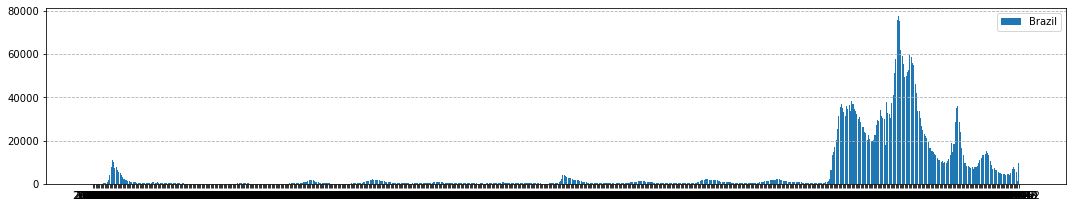

In [32]:
time = dtf2['year_week_sin_pri']

cases = dtf2['ones']

fig = plt.figure(figsize =(15, 3))

plt.bar(time, cases)

plt.legend(labels=['Brazil'])

plt.tight_layout()

plt.grid(axis = 'y',linestyle = '--')

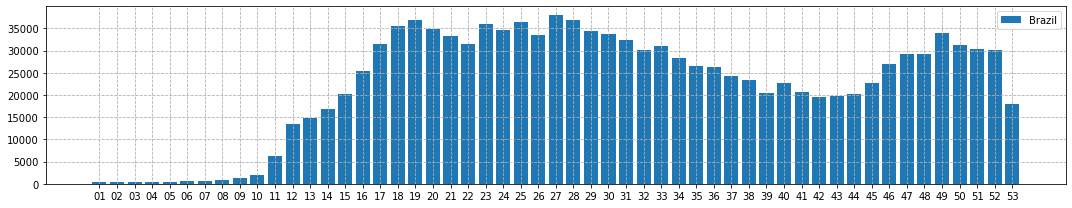

In [31]:
time = dtf1['week_sin_pri']

cases = dtf1['ones']

fig = plt.figure(figsize =(15, 3))

plt.bar(time, cases)

plt.legend(labels=['Brazil'])
plt.grid(linestyle = '--')

plt.tight_layout()


In [33]:
data0 = df.groupby(['sg_uf','dt_sin_pri'])['ones'].sum().reset_index()

In [34]:
data0[(data0['sg_uf'] == 35)&(data0['dt_sin_pri']> '2020-02-28') & (data0['dt_sin_pri'] < '2020-03-28')]

,sg_uf,dt_sin_pri,ones
49167,35,2020-02-29,50
49168,35,2020-03-01,108
49169,35,2020-03-02,86
49170,35,2020-03-03,102
49171,35,2020-03-04,75
49172,35,2020-03-05,88
49173,35,2020-03-06,114
49174,35,2020-03-07,117
49175,35,2020-03-08,158
49176,35,2020-03-09,215


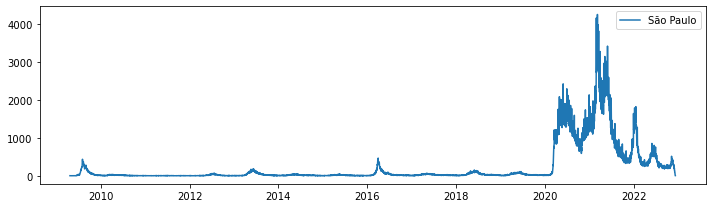

In [35]:
uf = 35

time = data0[data0['sg_uf'] == uf]['dt_sin_pri']

cases = data0[data0['sg_uf'] == uf]['ones']

fig = plt.figure(figsize =(10, 3))

plt.plot(time, cases)

plt.legend(labels=['São Paulo'])

plt.tight_layout()

In [36]:
data1 = df.groupby(['sg_uf','year_sin_pri','month_sin_pri'])['ones'].sum().reset_index()

In [37]:
s = 35
data_s = data1[data1['sg_uf'] == s]

In [38]:
table = pd.pivot_table(data_s, values='ones', index=['sg_uf', 'year_sin_pri'],
                     columns=['month_sin_pri'], aggfunc=np.sum)

In [39]:
table

month_sin_pri            1        2        3        4        5        6   \
sg_uf year_sin_pri                                                         
35    2009              NaN      NaN      NaN      8.0     29.0    348.0   
      2010            230.0    205.0    670.0    672.0    554.0    465.0   
      2011             52.0     43.0     53.0     73.0     67.0    101.0   
      2012             53.0     68.0     99.0    120.0    319.0    756.0   
      2013            125.0    106.0    259.0   1372.0   3256.0   3815.0   
      2014            207.0    213.0    415.0    830.0   1085.0    828.0   
      2015            110.0    182.0    370.0    519.0    811.0    571.0   
      2016            189.0    582.0   4763.0   7204.0   3130.0   1858.0   
      2017            245.0    385.0    821.0   1191.0   1443.0   1078.0   
      2018            262.0    341.0    602.0   1861.0   2940.0   3141.0   
      2019            247.0    361.0    995.0   1736.0   2230.0   2305.0   
      2020            469.0    864.0  18672.0  34127.0  47156.0  45275.0   
      2021          43504.0  48759.0  91351.0  60569.0  73184.0  57515.0   
      2022          40312.0  16196.0   9573.0   8941.0  13615.0  18022.0   

month_sin_pri            7        8        9        10       11       12  
sg_uf year_sin_pri                                                        
35    2009           3239.0   8906.0   4310.0   1804.0    748.0    389.0  
      2010            328.0    209.0    148.0    116.0     77.0     69.0  
      2011             88.0     66.0     45.0     68.0     60.0     52.0  
      2012           1453.0    833.0    346.0    184.0    111.0     91.0  
      2013           2317.0   1374.0    693.0    515.0    326.0    228.0  
      2014            406.0    415.0    335.0    311.0    177.0    123.0  
      2015            380.0    294.0    186.0    173.0    153.0    149.0  
      2016           1060.0    671.0    469.0    396.0    331.0    286.0  
      2017            813.0    580.0    499.0    504.0    384.0    359.0  
      2018           1982.0   1145.0    742.0    715.0    642.0    519.0  
      2019           1297.0    925.0    639.0    629.0    467.0    439.0  
      2020          47216.0  37897.0  28440.0  24401.0  31569.0  37976.0  
      2021          34234.0  22794.0  17069.0  13685.0  11721.0  19592.0  
      2022          11820.0   7880.0   6555.0   7061.0  10237.0   1232.0

In [40]:
data3 = df.groupby(['sg_uf','year_sin_pri','month_sin_pri'])['ones'].sum().reset_index()
data3.head()

,sg_uf,year_sin_pri,month_sin_pri,ones
0,0,2019,2,1
1,0,2019,3,3
2,0,2019,4,1
3,0,2019,5,4
4,0,2019,6,3


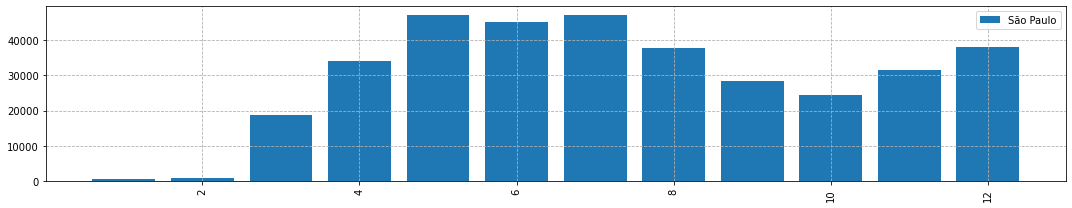

In [41]:
uf = 35

year = 2020

time = data3[(data3['sg_uf'] == uf) & (data3['year_sin_pri'] == year)]['month_sin_pri']

cases = data3[(data3['sg_uf'] == uf) & (data3['year_sin_pri'] == year)]['ones']

fig = plt.figure(figsize =(15, 3))

plt.bar(time, cases)

plt.legend(labels=['São Paulo'])

plt.xticks(rotation=90)

plt.grid(linestyle= '--')

plt.tight_layout()

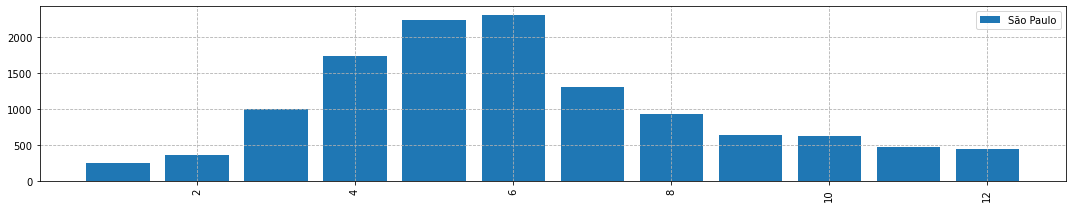

In [42]:
uf = 35

year = 2019

time = data3[(data3['sg_uf'] == uf) & (data3['year_sin_pri'] == year)]['month_sin_pri']

cases = data3[(data3['sg_uf'] == uf) & (data3['year_sin_pri'] == year)]['ones']

fig = plt.figure(figsize =(15, 3))

plt.bar(time, cases)

plt.legend(labels=['São Paulo'])

plt.xticks(rotation=90)

plt.grid(linestyle= '--')

plt.tight_layout()

In [26]:
# UF variable clean

In [31]:
df.groupby(['sg_uf'])['ones'].count()

sg_uf
0         528
11      26829
12      11259
13      63546
14       6405
15      89116
16       8237
17      24397
21      42891
22      36546
23     153809
24      35800
25      53901
26     148182
27      39605
28      34263
29     135815
31     420050
32      34451
33     319424
35    1108240
41     341851
42     147686
43     219660
50      68737
51      60670
52     121391
53      73819
Name: ones, dtype: int64

In [32]:
df.groupby(['sg_uf_not'])['ones'].count()

sg_uf_not
11      26591
12      11476
13      62186
14       6285
15      87753
16       8408
17      24617
21      41179
22      37985
23     154030
24      35709
25      53800
26     148663
27      39322
28      34690
29     135123
31     418642
32      34294
33     319004
35    1113319
41     342547
42     147792
43     219219
50      68198
51      59803
52     114112
53      82361
Name: ones, dtype: int64

# Clean municipality variables

In [33]:
df.head()

,ano,sg_uf,sg_uf_not,codmunres,codmunnot,dt_sin_pri,dt_notific,sem_not,classi_fin,criterio,ones,year_sin_pri,month_sin_pri,year_week_sin_pri,year_sin_not,month_sin_not,year_week_sin_not
0,2011,11,11,110020.0,110020,2011-02-15,2011-02-21,201108,3.0,1.0,1,2011,2,2011-07,2011.0,2.0,2011-08
1,2011,11,53,110020.0,530010,2011-03-29,2011-04-07,201114,3.0,1.0,1,2011,3,2011-13,2011.0,4.0,2011-14
2,2011,11,11,110020.0,110020,2011-04-28,2011-05-04,201118,3.0,1.0,1,2011,4,2011-17,2011.0,5.0,2011-18
3,2011,11,11,110020.0,110020,2011-08-23,2011-08-27,201134,1.0,1.0,1,2011,8,2011-34,2011.0,8.0,2011-34
4,2011,11,11,110012.0,110020,2011-08-18,2011-08-31,201135,3.0,1.0,1,2011,8,2011-33,2011.0,8.0,2011-35


In [43]:
df['codmunres'] = df['codmunres'].fillna(0)
df['codmunres'] = df['codmunres'].astype(int)

In [44]:
df['codmunnot'] = df['codmunnot'].fillna(0)
df['codmunnot'] = df['codmunnot'].astype(int)

In [45]:
lst2 = df['codmunres'].astype(str).apply(len).tolist()

In [46]:
np.unique(np.array(lst2))

array([1, 6])

In [47]:
lst3 = df['codmunnot'].astype(str).apply(len).tolist()

In [48]:
np.unique(np.array(lst3))

array([6])

In [ ]:
# Municipality variable clean

# Clean classification variable

### Observe that this variable has 176498*100/3827108 = 4.61% of null values

### The cathegories are:

1-SRAG por influenza

2-SRAG por outro vírus respiratório

3-SRAG por outro agente etiológico

4-SRAG não especificado

5-SRAG por covid-19

9-Ignorado

In [49]:
df['classi_fin'].unique()

array([ 3.,  1.,  2., nan,  4.,  9.,  5.])

In [50]:
df['classi_fin'] = df['classi_fin'].fillna(0)
df['classi_fin'] = df['classi_fin'].astype(int)

# Filter variables for aggregation at municipal level

In [42]:
df.columns

Index(['ano', 'sg_uf', 'sg_uf_not', 'codmunres', 'codmunnot', 'dt_sin_pri',
       'dt_notific', 'sem_not', 'classi_fin', 'criterio', 'ones',
       'year_sin_pri', 'month_sin_pri', 'year_week_sin_pri', 'year_sin_not',
       'month_sin_not', 'year_week_sin_not'],
      dtype='object')

In [51]:
df_agre = df.groupby(['sg_uf','codmunres','dt_sin_pri','year_sin_pri','month_sin_pri','year_week_sin_pri','classi_fin'])['ones'].sum().reset_index()

In [52]:
df_agre.head()

,sg_uf,codmunres,dt_sin_pri,year_sin_pri,month_sin_pri,year_week_sin_pri,classi_fin,ones
0,0,0,2019-02-18,2019,2,2019-08,4,1
1,0,0,2019-03-11,2019,3,2019-11,4,1
2,0,0,2019-03-12,2019,3,2019-11,1,1
3,0,0,2019-03-28,2019,3,2019-13,1,1
4,0,0,2019-04-20,2019,4,2019-16,2,1


In [45]:
df_agre[df_agre['sg_uf']== 0].groupby(['classi_fin','year_sin_pri'])['ones'].sum()

classi_fin  year_sin_pri
0           2019              1
            2020              2
            2021              5
            2022             11
1           2019              8
            2020              8
            2021              3
            2022              2
2           2019              6
            2020              5
            2021              4
            2022             17
3           2020              1
            2021              1
            2022              1
4           2019             22
            2020             42
            2021             36
            2022             43
5           2020             55
            2021            211
            2022             44
Name: ones, dtype: int64

In [46]:
# Vamos excluir 'sg_uf'= 0

In [47]:
df_agre = df_agre[df_agre['sg_uf']!= 0]

In [53]:
df_agre.loc[620078, 'sg_uf'] = 11

In [50]:
df_agre.head()

,sg_uf,codmunres,dt_sin_pri,year_sin_pri,month_sin_pri,year_week_sin_pri,classi_fin,ones
0,0,0,2019-01-09,2019,1,2019-01,4,1
1,0,0,2019-02-08,2019,2,2019-05,4,1
2,0,0,2019-02-18,2019,2,2019-07,4,1
3,0,0,2019-03-10,2019,3,2019-10,4,1
4,0,0,2019-03-28,2019,3,2019-12,1,1


In [52]:
df_agre[df_agre['codmunres'] == 999999]

,sg_uf,codmunres,dt_sin_pri,year_sin_pri,month_sin_pri,year_week_sin_pri,classi_fin,ones
1508415,53,999999,2021-03-25,2021,3,2021-12,4,1
1508416,53,999999,2021-10-21,2021,10,2021-42,5,1


In [51]:
df_agre[(df_agre['codmunres'] == 110001) & (df_agre['classi_fin'] == 1)]

,sg_uf,codmunres,dt_sin_pri,year_sin_pri,month_sin_pri,year_week_sin_pri,classi_fin,ones
448,11,110001,2016-05-13,2016,5,2016-19,1,1
688663,35,110001,2009-09-12,2009,9,2009-36,1,1


# Merge data with appropriate geographical identifications

In [54]:
codigo_muni = pd.read_excel('/Users/julianeoliveira/Documents/Projects/AESOP/AESOP datalake/DTB_BRASIL_MUNICIPIO.xls')

In [55]:
codigo_muni.head()

,UF,Nome_UF,Mesorregião Geográfica,Nome_Mesorregião,Microrregião Geográfica,Nome_Microrregião,Município,Código Município Completo,Nome_Município
0,11,Rondônia,2,Leste Rondoniense,6,Cacoal,15,1100015,Alta Floresta D'Oeste
1,11,Rondônia,2,Leste Rondoniense,6,Cacoal,379,1100379,Alto Alegre dos Parecis
2,11,Rondônia,2,Leste Rondoniense,3,Ariquemes,403,1100403,Alto Paraíso
3,11,Rondônia,2,Leste Rondoniense,5,Alvorada D'Oeste,346,1100346,Alvorada D'Oeste
4,11,Rondônia,2,Leste Rondoniense,3,Ariquemes,23,1100023,Ariquemes


In [56]:
codigo_muni.rename(columns={'Código Município Completo':'codmuni_full'}, 
                 inplace=True);

In [57]:
codigo_muni['codmuni_full'].nunique()

5570

In [58]:
codigo_muni['codmunres'] = codigo_muni.codmuni_full.floordiv(10)

In [59]:
data_teste = df_agre.merge(right = codigo_muni, on = ["codmunres"])

In [60]:
df_agre['codmunres'].nunique()

5632

In [61]:
data_teste['codmunres'].nunique()

5570

In [62]:
print(data_teste['ones'].sum())
print(df_agre['ones'].sum())

3758047
3827108


In [ ]:
(3826580 - 3758047)*100/3826580

In [ ]:
3826580 - 3758047

<AxesSubplot:xlabel='sg_uf'>

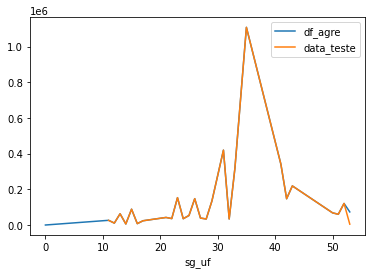

In [63]:
ax = df_agre.groupby(['sg_uf'])['ones'].sum().reset_index().plot('sg_uf','ones',label = 'df_agre')
data_teste.groupby(['sg_uf'])['ones'].sum().reset_index().plot('sg_uf','ones', ax=ax,label='data_teste')

# Save data

In [64]:
data_teste.to_csv('/Users/julianeoliveira/Documents/Projects/AESOP/AESOP datalake/Clean_ETL/srag_aggregated_2009_2022.csv')

In [ ]:
data_teste